In [1]:
%reload_ext tgpy
import tgpy as tg

ModuleNotFoundError: No module named 'tgpy'

In [2]:
npriors = 3 # 1, 2, 3
ngroups = 1 # any positive int
nparams = 300 # number of chains
niters = 300 # number of iterations

### Create Priors

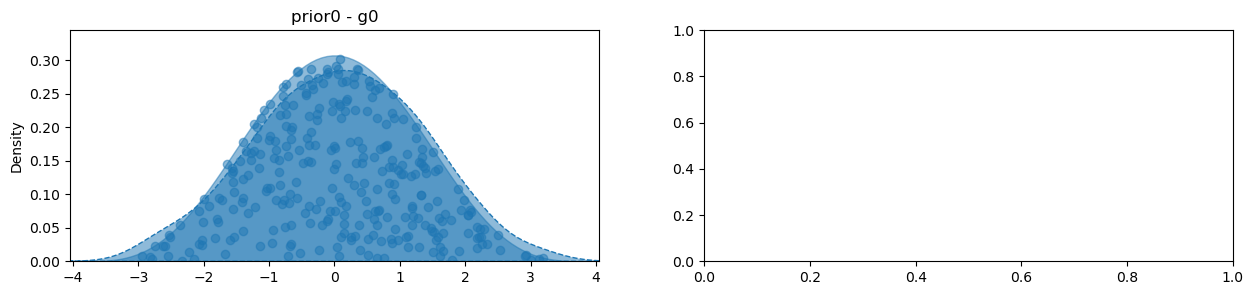

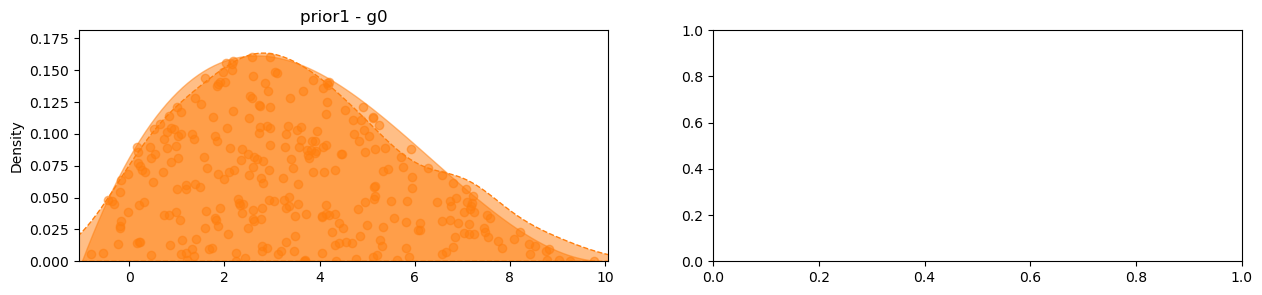

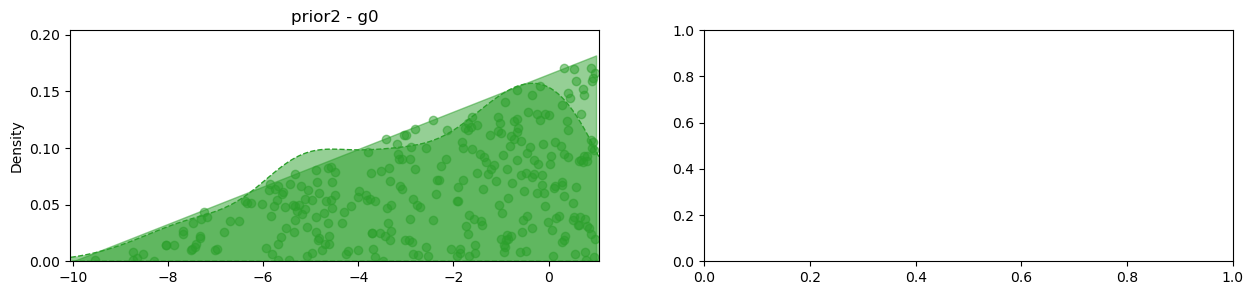

In [3]:
prior0 = tg.TgPriorUnivariate('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                               low=-4, high=4, alpha=5, beta=5) # simetrico
prior1 = tg.TgPriorUnivariate('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                               low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
prior2 = tg.TgPriorUnivariate('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                               low=-10, high=1, alpha=2, beta=1) # masa a la derecha

if npriors == 1:
    k = tg.DummyKernel(prior0)
elif npriors == 2:
    k = tg.DummyKernel(prior0, prior1)
else:
    k = tg.DummyKernel(prior0, prior1, prior2)


cov = tg.CovarianceTransport(k, noise=None)
tgp = tg.TGP([cov], dt=None, annealing=0)

tgp.sample_priors()
tgp.plot_priors()

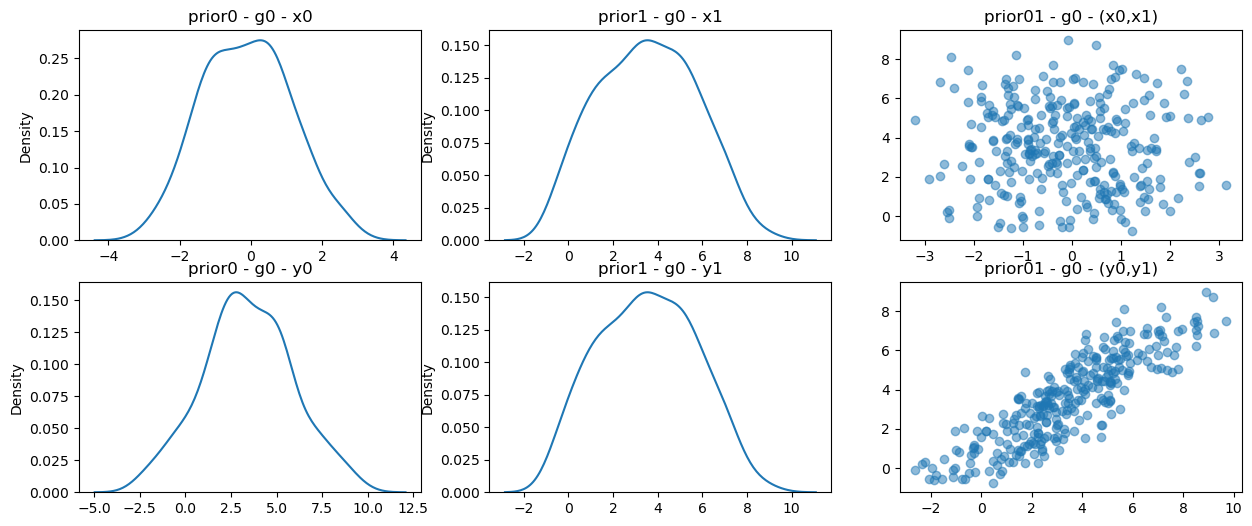

In [4]:
prior01 = tg.TgPriorBivariate('prior01', [prior0, prior1], r=1, dim=nparams)
prior01.sample_params()
prior01.logp()

k = tg.DummyKernel(prior01.marginal(prior0.name, 0), prior01.marginal(prior1.name, 1))

cov = tg.CovarianceTransport(k, noise=None)
tgp01 = tg.TGP([cov], dt=None, annealing=0)
tgp01.plot_priors()

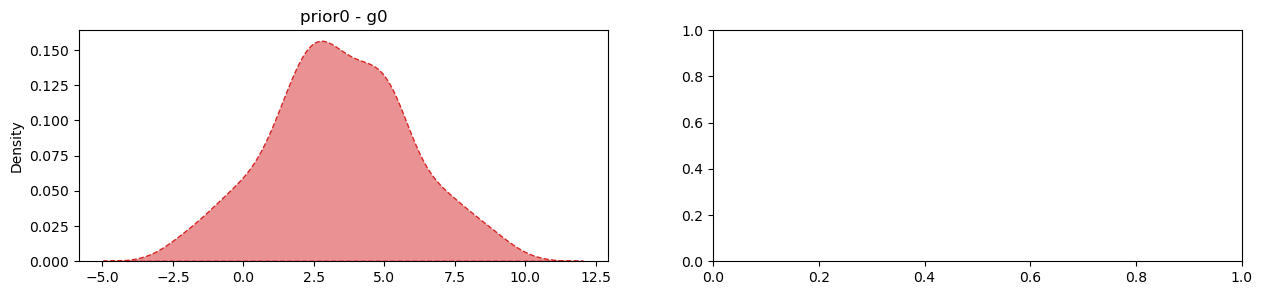

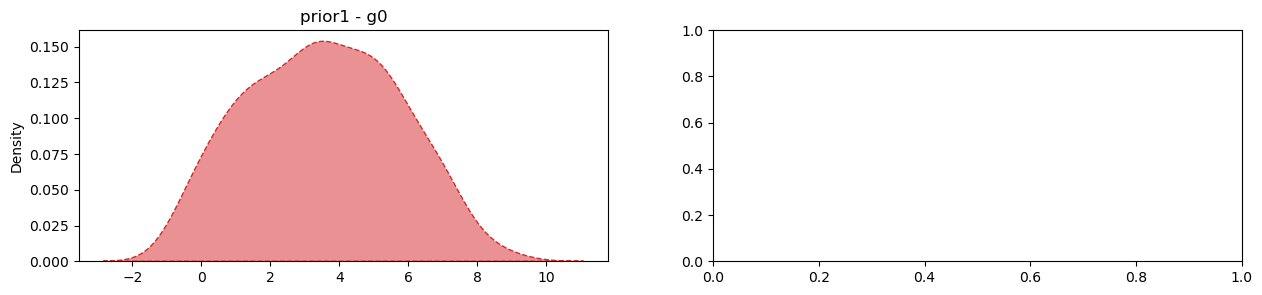

In [5]:
tgp01.plot_marginals()

### SGD

  0%|                                                                                                         …

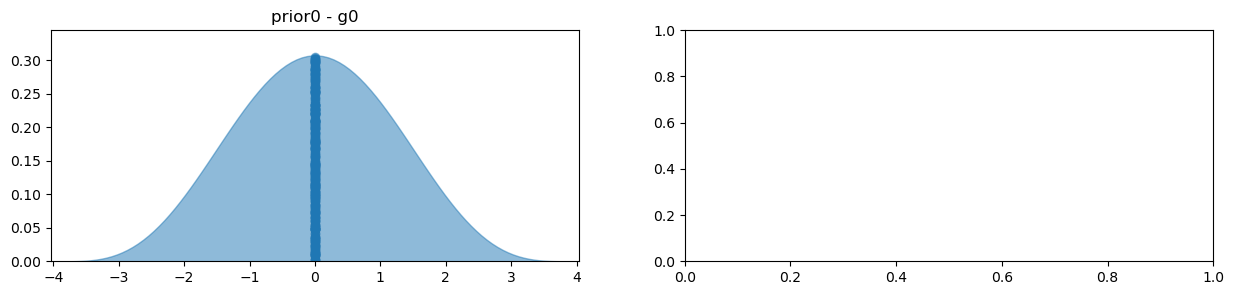

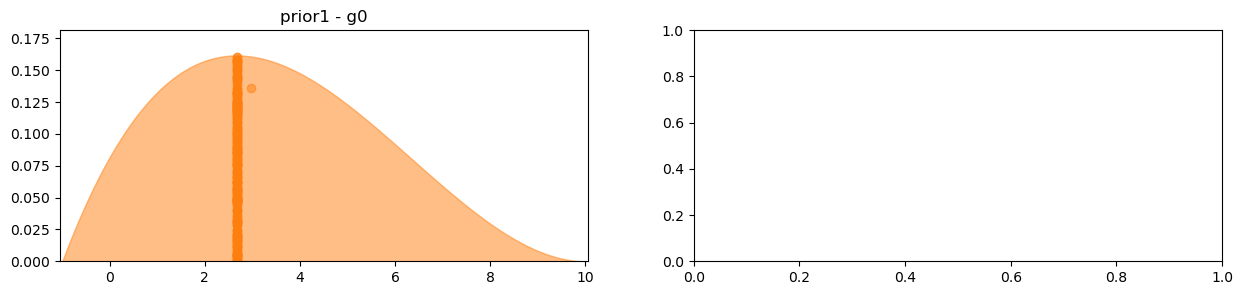

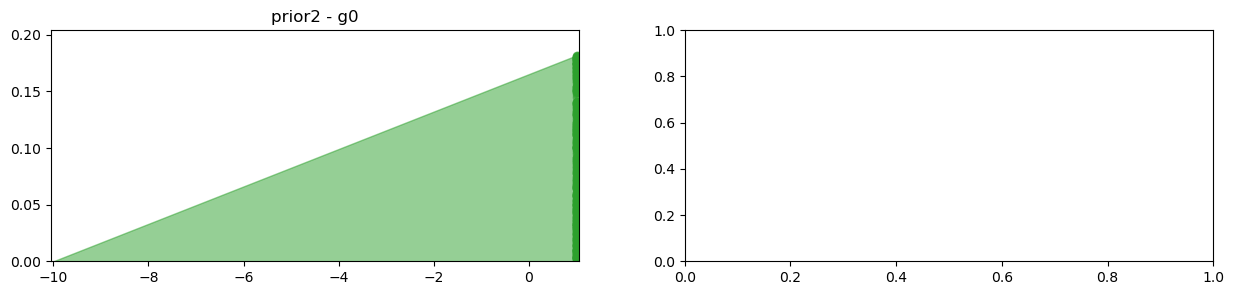

In [6]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_sgd(niters)
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

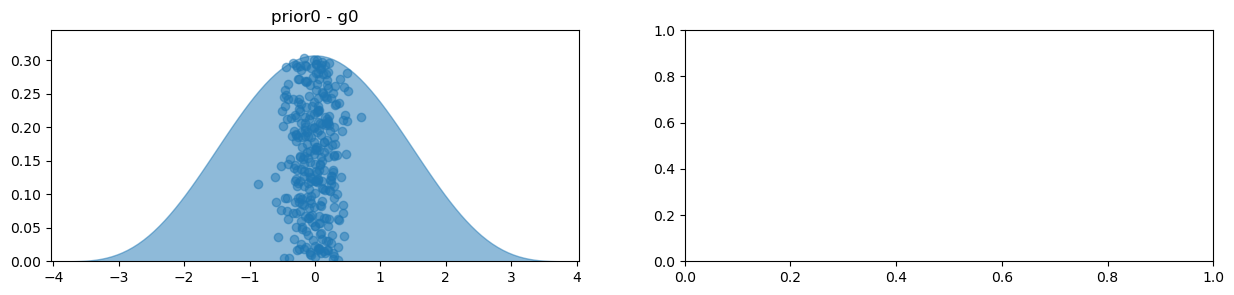

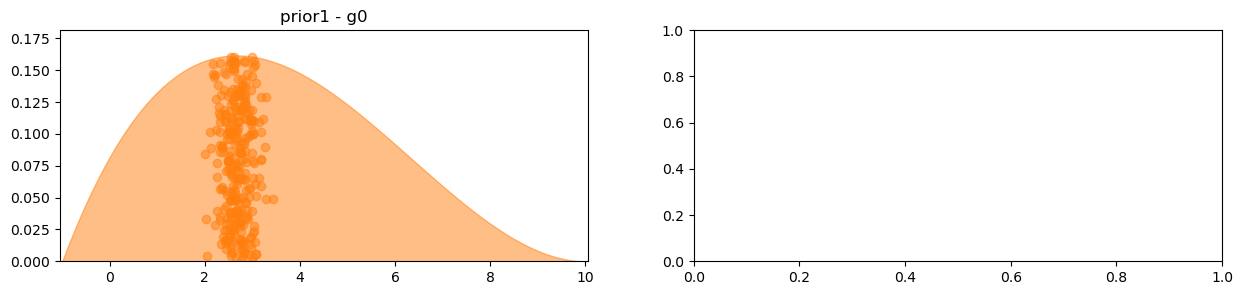

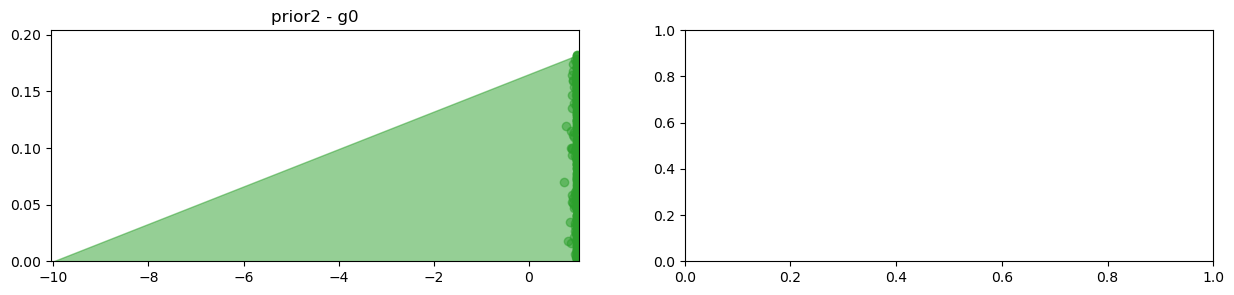

In [7]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_sgd(niters, langevin=True, langevin_add=0.1)
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

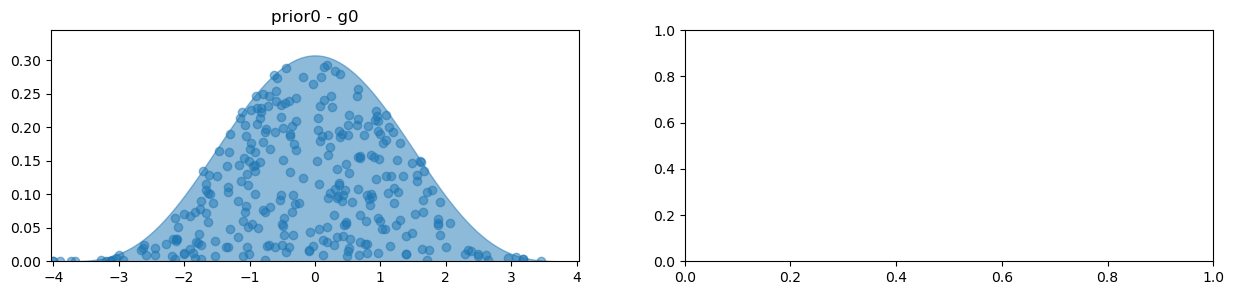

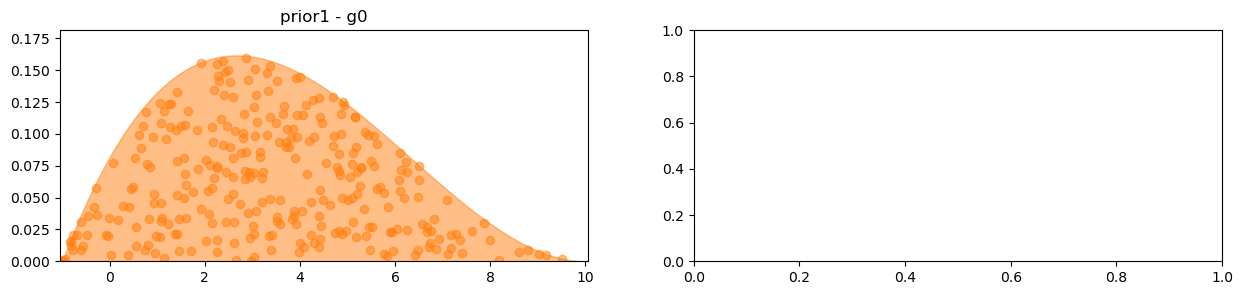

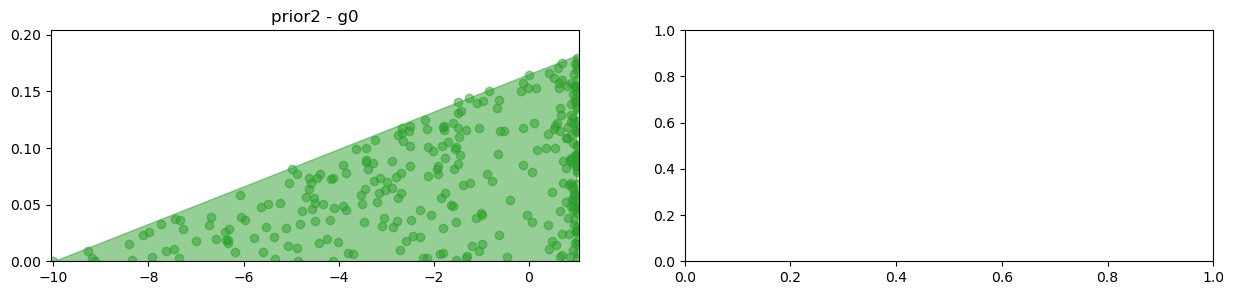

In [21]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_svgd(niters, grassman=False)
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

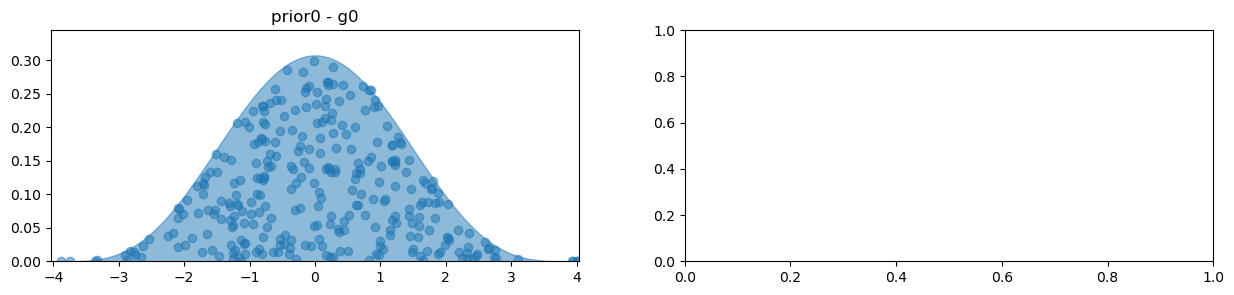

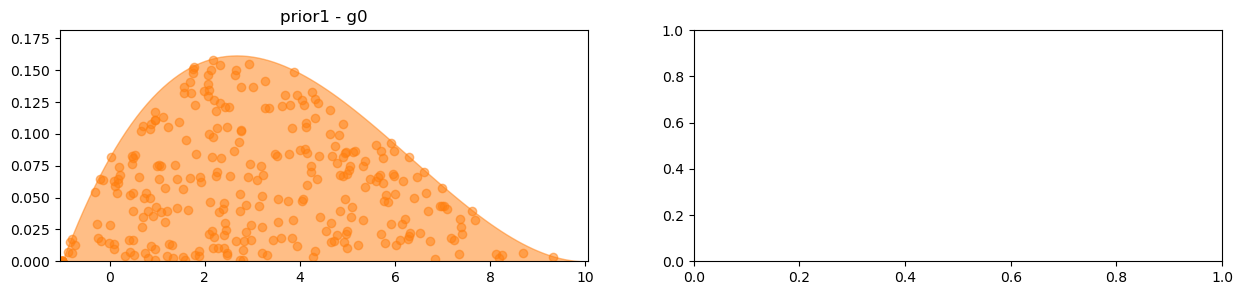

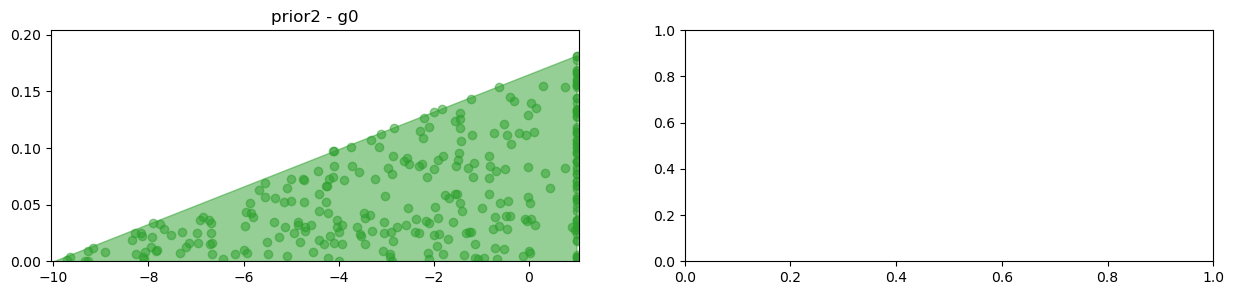

In [22]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_svgd(niters, grassman=True)
tgp.plot_priors(kde=False)

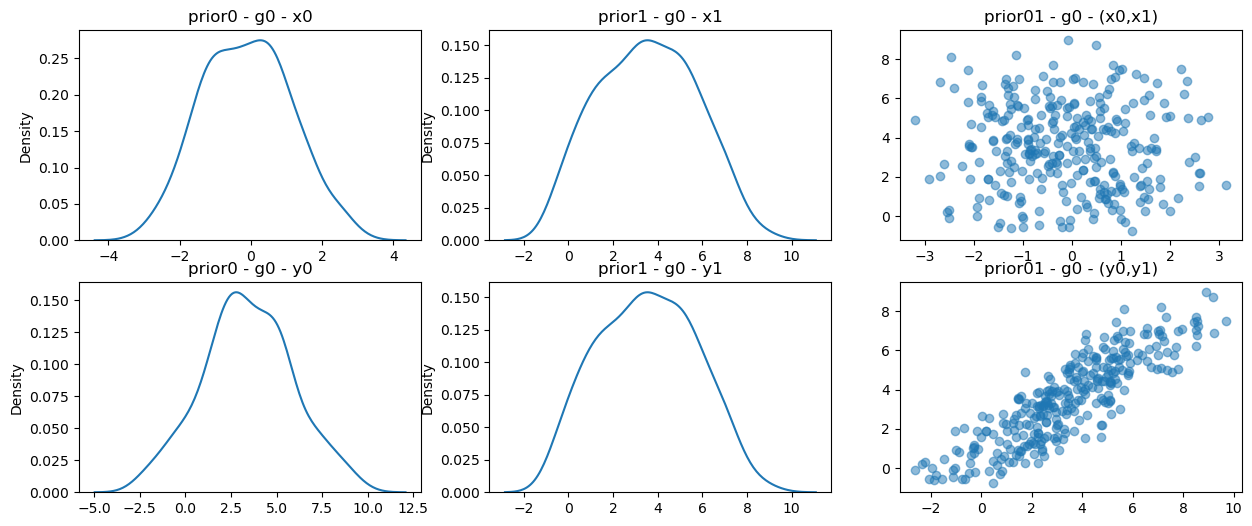

In [10]:
tgp01.plot_priors()

  0%|                                                                                                         …

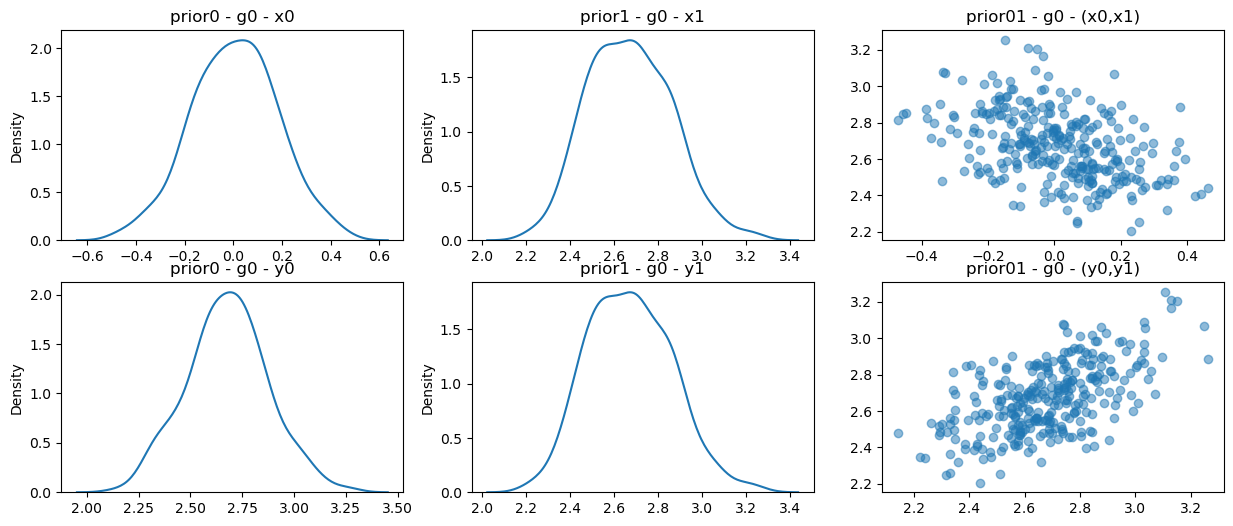

In [11]:
learning01 = tg.TgLearning(tgp01, lr=0.1)
learning01.execute_sgd(niters, langevin=True)
tgp01.plot_priors()

  0%|                                                                                                         …

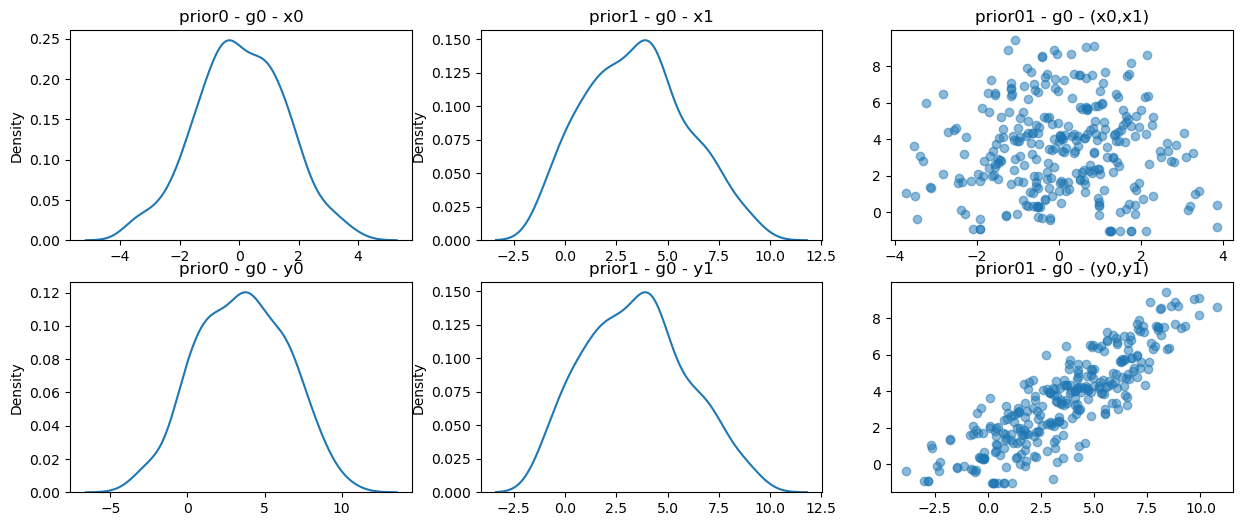

In [12]:
learning01 = tg.TgLearning(tgp01, lr=0.1)
learning01.execute_svgd(niters, grassman=False)
tgp01.plot_priors()

  0%|                                                                                                         …

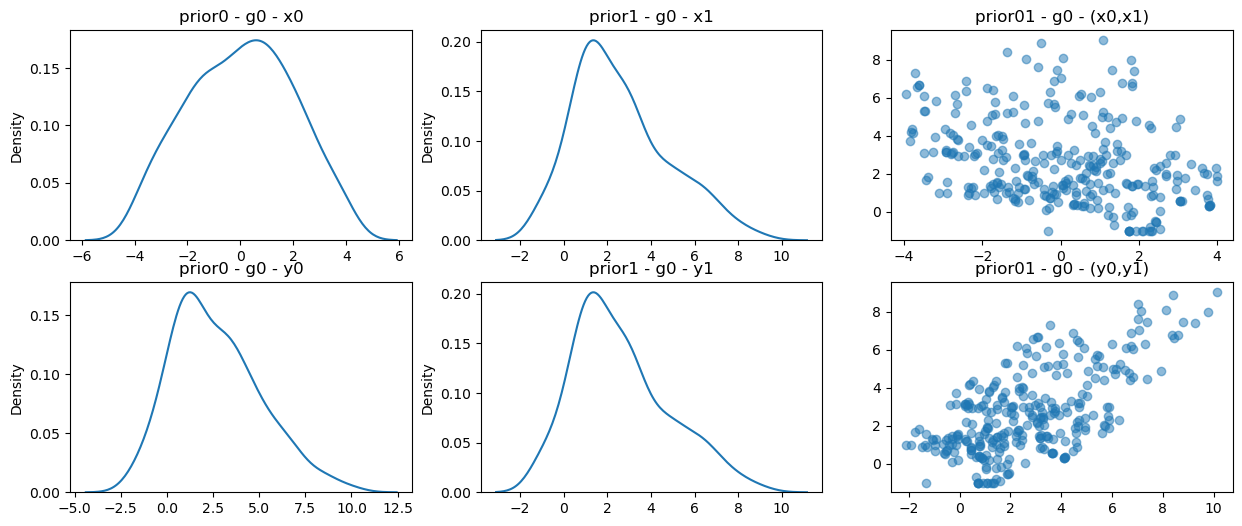

In [13]:
learning01.execute_svgd(niters, grassman=True)
tgp01.plot_priors()

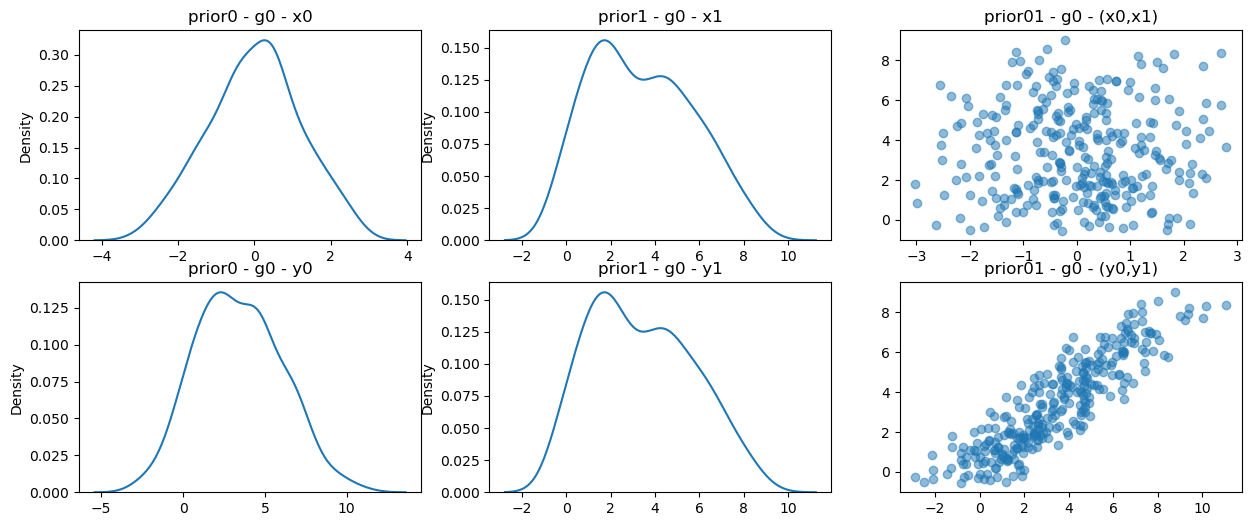

In [14]:
prior01.sample_params()
tgp01.plot_priors()

  0%|                                                                                                         …

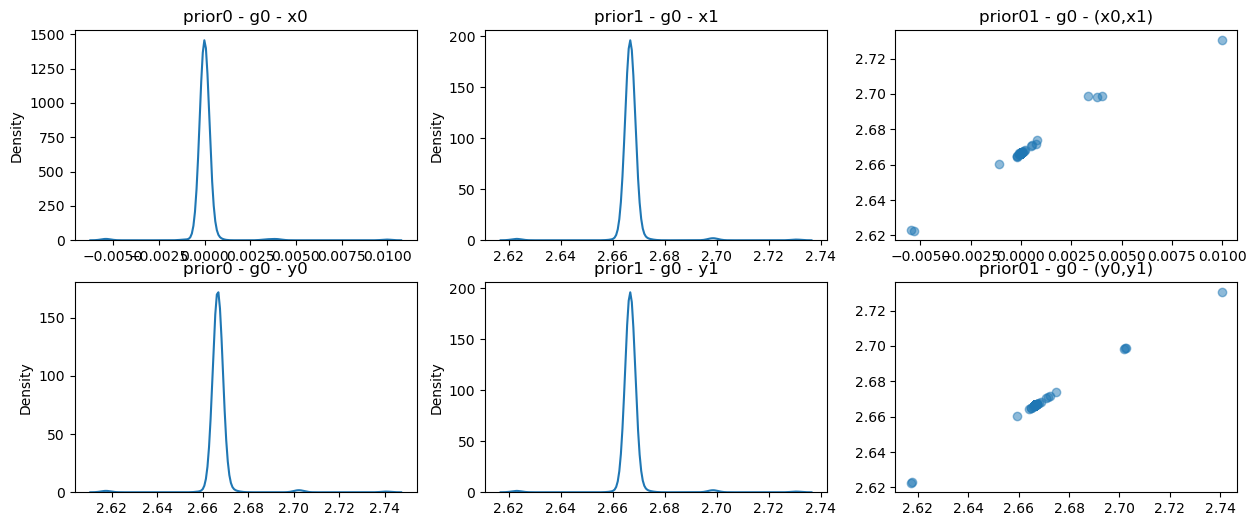

In [15]:
learning01.execute_sgd(niters, langevin=False)
tgp01.plot_priors()

### SVGD

In [16]:
import numpy as np
import matplotlib.pyplot as plt

theta_mean = np.array([4,0])[:,None]

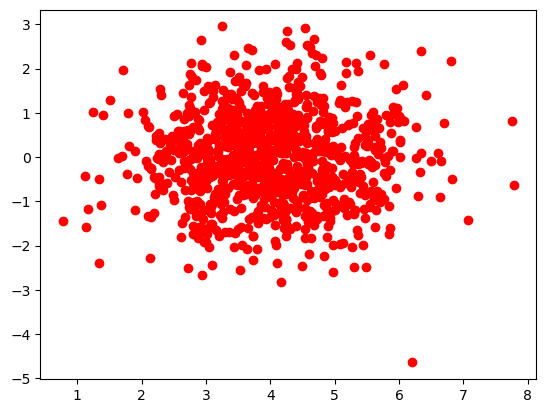

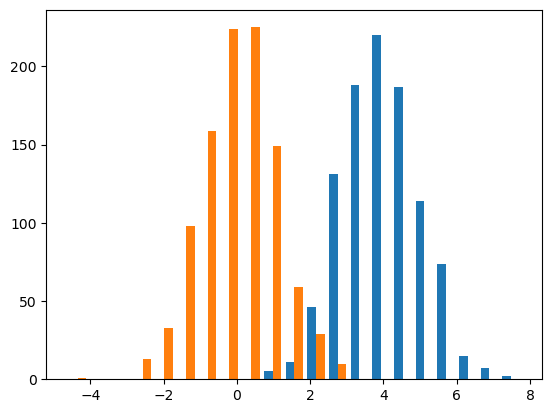

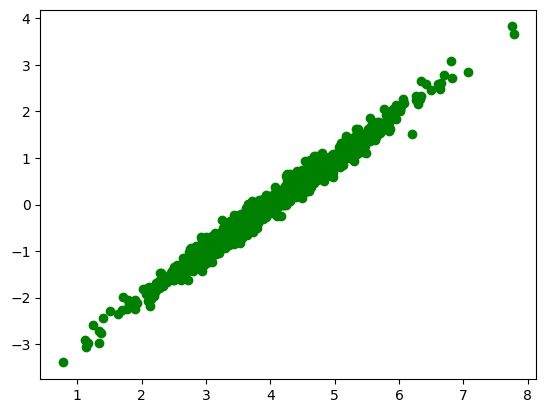

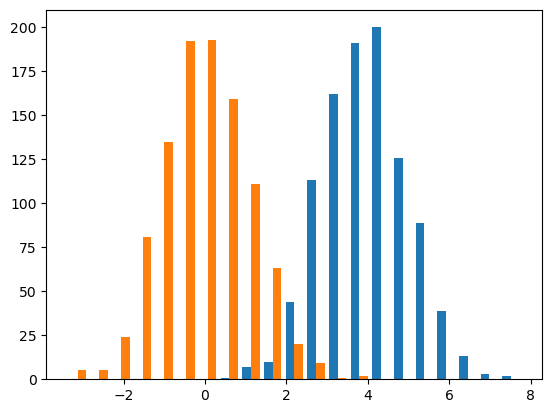

In [17]:
r = 0.99
cov = np.array([[1,r],[r,1]])


theta0 = np.random.randn(2, 1000)
theta1 = np.linalg.cholesky(cov).dot(theta0)
theta0 += theta_mean
theta1 += theta_mean


plt.scatter(theta0[0], theta0[1], color='r')
plt.show()
plt.hist(theta0.T, bins=21)
plt.show()

plt.scatter(theta1[0], theta1[1], color='g')
plt.show()
plt.hist(theta1.T, bins=21)
plt.show()

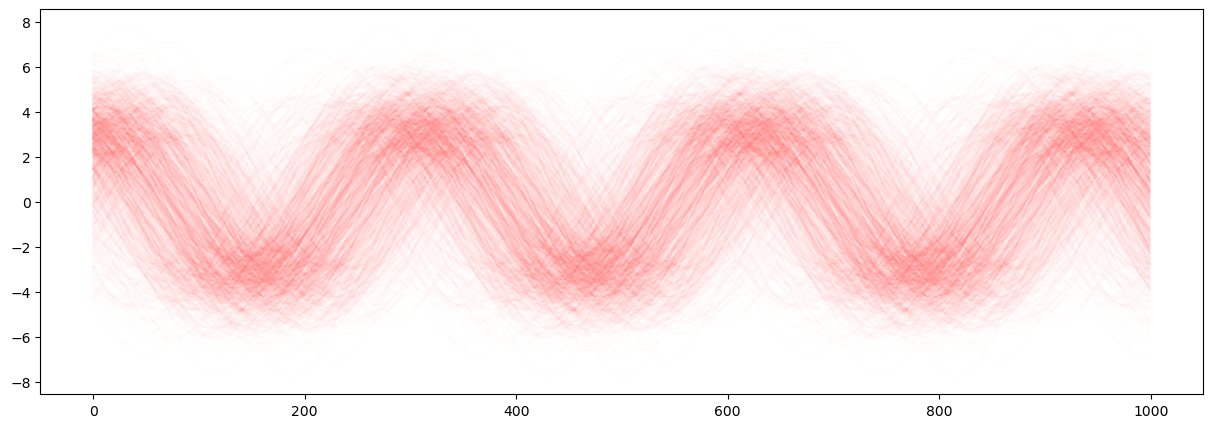

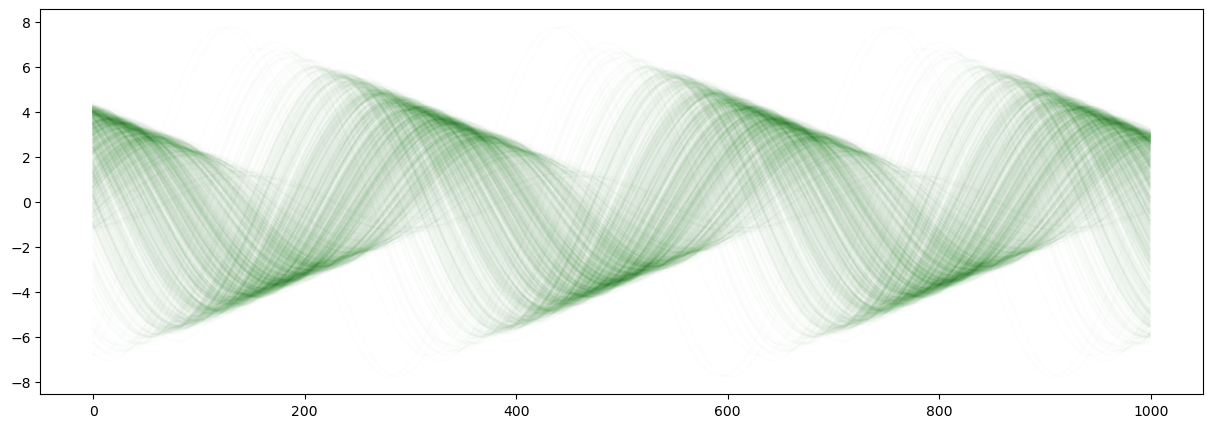

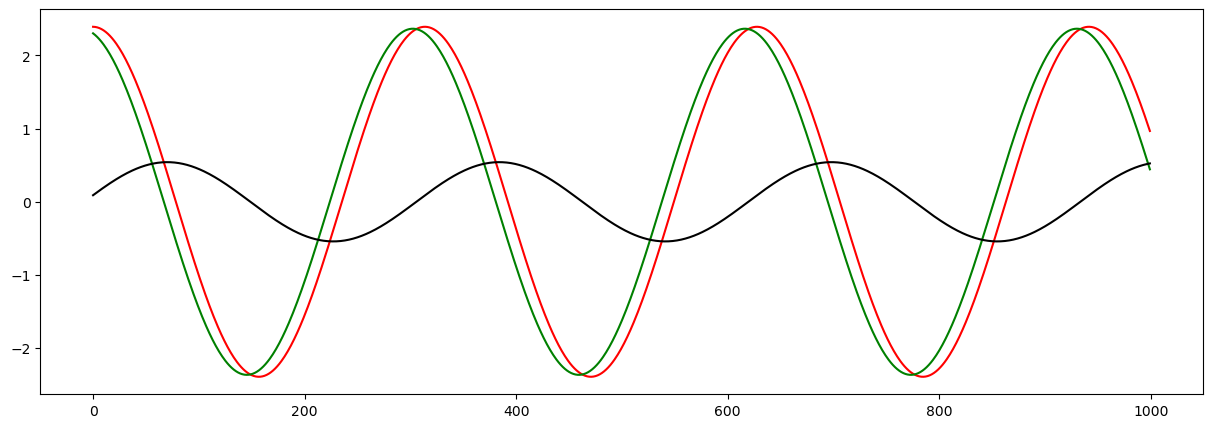

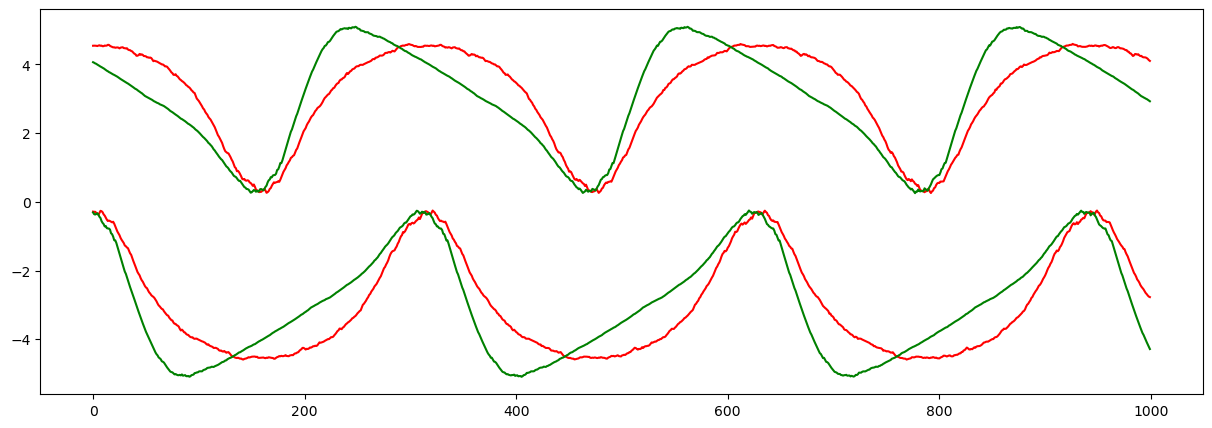

In [18]:
x0 = np.linspace(0,20,1000)[:,None] 

y0 = np.cos(x0 + theta0[1]) * theta0[0]

y1 = np.cos(x0 + theta1[1]) * theta1[0]

plt.figure(1, figsize=(15,5))
plt.plot(y0, color='r', alpha=0.01);

plt.figure(2, figsize=(15,5))
plt.plot(y1, color='g', alpha=0.01);


plt.figure(3, figsize=(15,5))

plt.plot(np.mean(y0, 1), color='r')
plt.plot(np.mean(y1, 1), color='g')

plt.plot(np.mean(y0, 1) - np.mean(y1, 1), color='k')

plt.figure(4, figsize=(15,5))

plt.plot(np.percentile(y0, 10, 1), color='r')
plt.plot(np.percentile(y0, 90, 1), color='r')


plt.plot(np.percentile(y1, 10, 1), color='g')
plt.plot(np.percentile(y1, 90, 1), color='g')

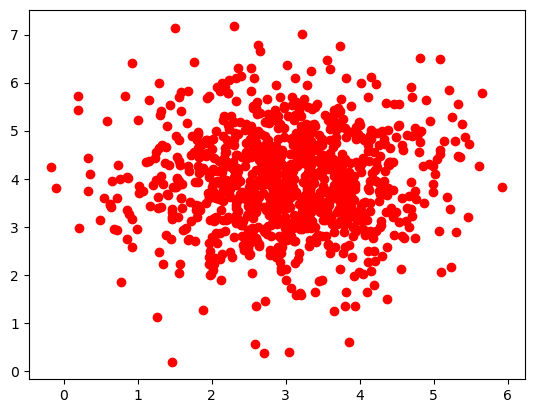

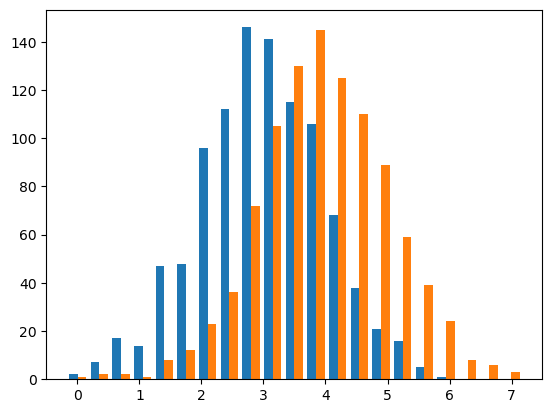

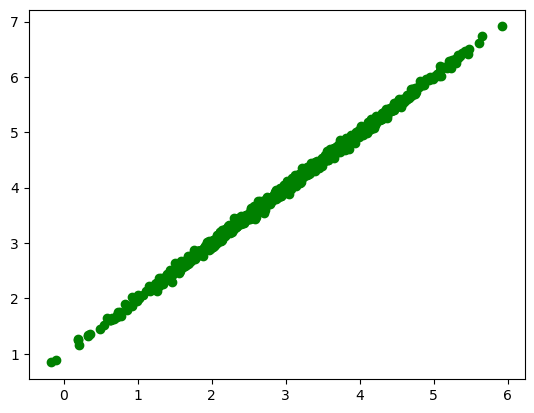

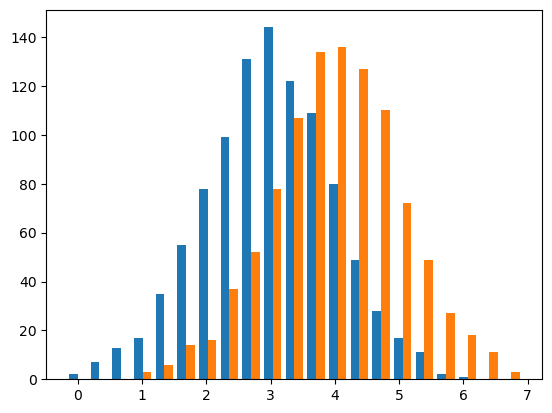

In [19]:
theta_mean = np.array([3,4])[:,None]
r = 0.999
cov = np.array([[1,r],[r,1]])


theta0 = np.random.randn(2, 1000)
theta1 = np.linalg.cholesky(cov).dot(theta0)
theta0 += theta_mean
theta1 += theta_mean



plt.scatter(theta0[0], theta0[1], color='r')
plt.show()
plt.hist(theta0.T, bins=21)
plt.show()

plt.scatter(theta1[0], theta1[1], color='g')
plt.show()
plt.hist(theta1.T, bins=21)
plt.show()

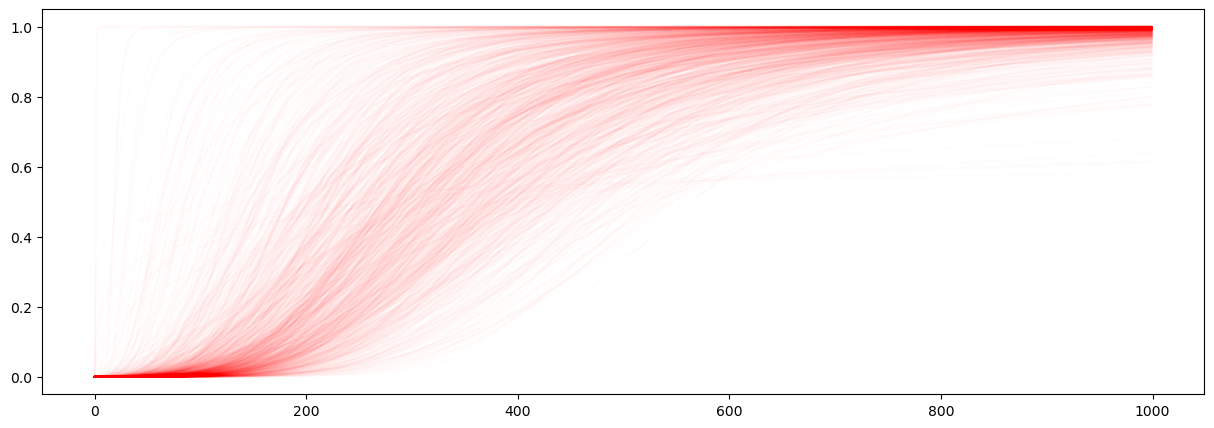

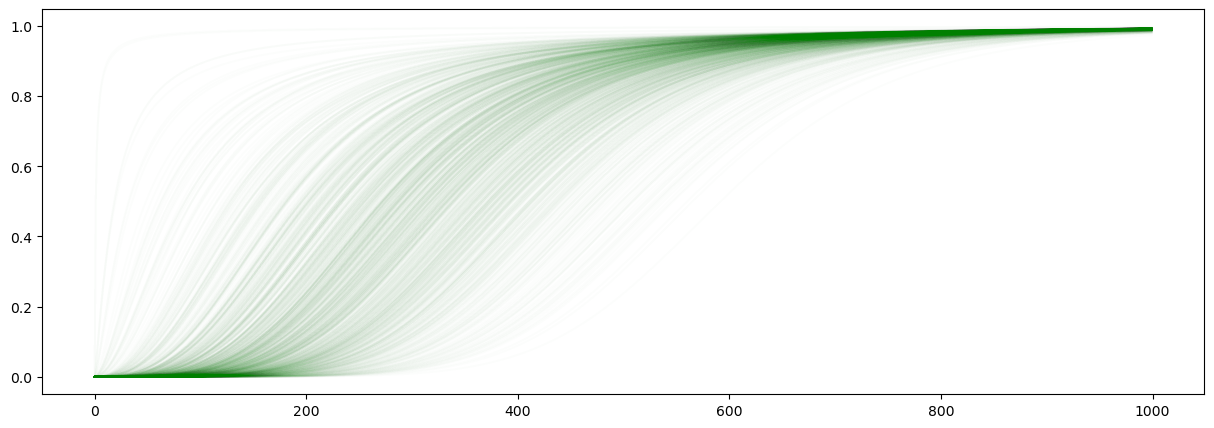

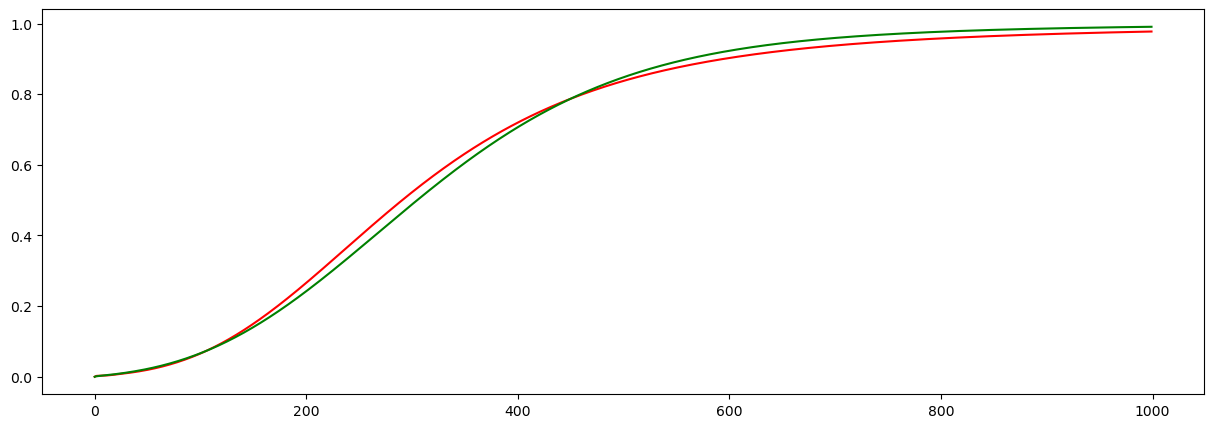

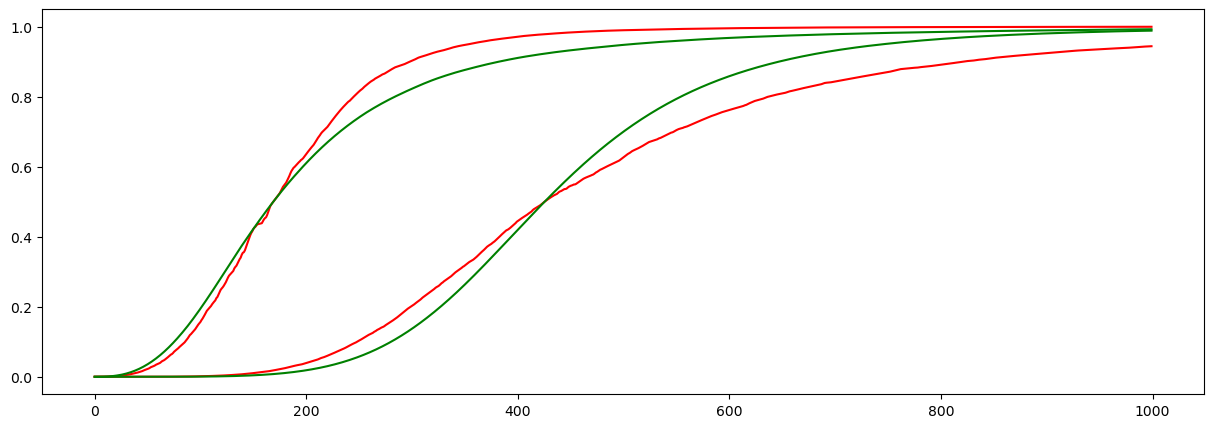

In [20]:
def s(x, u, b):
    u = np.clip(u, 0.01, 10)
    b = np.clip(b, 0.01, 10)
    return x**b/(x**b+u**b)

x0 = np.linspace(0,10,1000)[:,None]

y0 = s(x0, theta0[0], theta0[1])

y1 = s(x0, theta1[0], theta1[1])

plt.figure(1, figsize=(15,5))
plt.plot(y0, color='r', alpha=0.01);

plt.figure(2, figsize=(15,5))
plt.plot(y1, color='g', alpha=0.01);


plt.figure(3, figsize=(15,5))

plt.plot(np.mean(y0, 1), color='r')
plt.plot(np.mean(y1, 1), color='g')

plt.figure(4, figsize=(15,5))

plt.plot(np.percentile(y0, 10, 1), color='r')
plt.plot(np.percentile(y0, 90, 1), color='r')


plt.plot(np.percentile(y1, 10, 1), color='g')
plt.plot(np.percentile(y1, 90, 1), color='g')